In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

In [2]:
#Importando o MNIST dataset através do Keras datasets
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)

(60000, 28, 28)


In [3]:
#standarlizando (dividindo cada pixel por 255 - escala entre 0 e 1) e separando o X_train_full em cross_val e treino
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [4]:
#selecionando o nome de cada variável e colocando em uma lista
label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

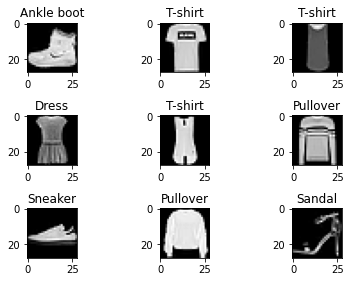

In [5]:
# display de uma imagem de exemplo com a sua label
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.gcf().tight_layout(pad=1.0)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.gca().set_title(label_names[y_train_full[i]])

In [6]:
#construindo a arquitetura de MLP

#Criando um modelo sequencial
model = keras.models.Sequential()
#Adicionando o primeiro later de flatten(pra poder pegar os inputs das imagems e colocar em um array 1D)
model.add(keras.layers.Flatten(input_shape=[28,28]))
#Adicionando O layer input, o do meio e o output - Dense fully connected layers
model.add(keras.layers.Dense(units=300, activation='relu'))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [7]:
#sumário do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
#pegando os layers do modelo
model.layers

In [9]:
hidden1 = model.layers[1]
print(hidden1.name)
model.get_layer('dense') is hidden1

dense


True

In [10]:
#podemos acessar os parametros do modelo através do get_weights e set_weights
weights, biases = hidden1.get_weights()
weights

array([[ 0.02834515,  0.00983046, -0.05213643, ..., -0.01070128,
        -0.04410188,  0.07402918],
       [-0.04387953,  0.06254452, -0.03190259, ..., -0.07075229,
        -0.03604467,  0.04518043],
       [ 0.03118128,  0.02143394,  0.05519864, ...,  0.07259154,
         0.0562115 , -0.0661879 ],
       ...,
       [ 0.00923215,  0.02161951,  0.07333647, ...,  0.06353572,
         0.01463676, -0.03909208],
       [-0.05735021, -0.02196622, -0.0065358 , ...,  0.01943904,
         0.03088297,  0.03092285],
       [ 0.00785384,  0.04351154,  0.00183187, ..., -0.03469212,
        -0.0233673 ,  0.00308067]], dtype=float32)

In [11]:
# mostrando o shape do primeiro Dense layer. Lembrar que o shape é (n_neuros_layer, n_inputs) 
weights.shape

(784, 300)

In [12]:
#compilando o modelo
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [13]:
#treinando o modelo
history = model.fit(X_train,
          y_train, 
          epochs=30, 
          validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7131 - accuracy: 0.7671 - val_loss: 0.5040 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4865 - accuracy: 0.8314 - val_loss: 0.4327 - val_accuracy: 0.8566
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4409 - accuracy: 0.8459 - val_loss: 0.4526 - val_accuracy: 0.8420
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4136 - accuracy: 0.8546 - val_loss: 0.4458 - val_accuracy: 0.8406
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3936 - accuracy: 0.8604 - val_loss: 0.3827 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3783 - accuracy: 0.8663 - val_loss: 0.3861 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3653 - accuracy: 0.8717 - val_loss: 0.3647 - val_accuracy:

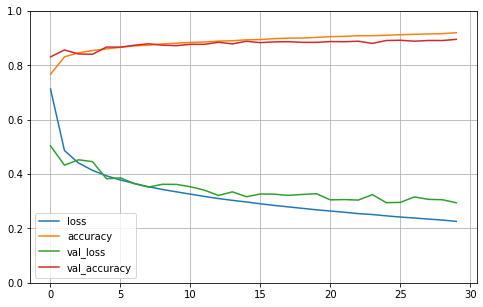

In [14]:
#plotando a learning curve - Keras depois de fitar o modelo retorna a variavel history, que possui:
      # history.params - parametros treinados
      # history.epoch - lista de epochs 
      # history.history - lista com as métricas de cada epoch, que pode ser usada pra plotar learning curve. 
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
#Podemos validar o modelo no hold_out set para ver o quão bem o modelo consegue generalizar.
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8834


[0.3267488181591034, 0.883400022983551]

In [23]:
#utilizando o modelo para prever novos casos:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
#podemos utilizar o predict_classes pra trazer a classe com maior probabilidade 
y_pred = model.predict_classes(X_new)
np.array(label_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')